In [3]:
import cv2
import matplotlib.pyplot as plt


In [4]:
image = cv2.imread("../images/shapes.jpg")

image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

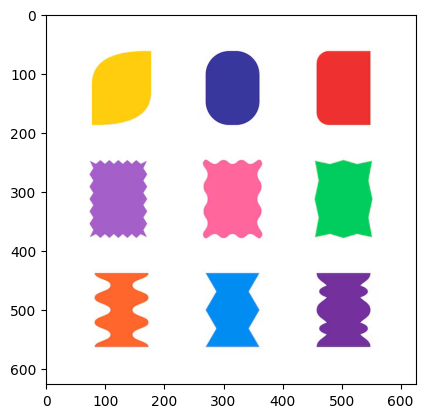

In [5]:
plt.imshow(image_rgb)

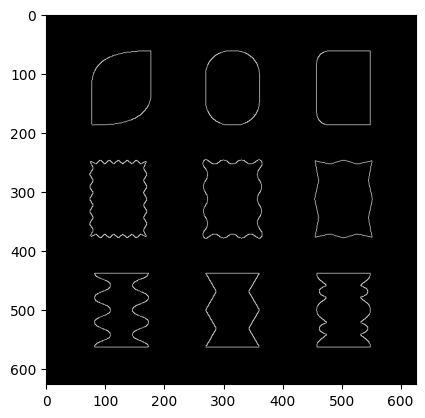

In [6]:
gray = cv2.Canny(image_gray,80,150) # masking
plt.imshow(gray,cmap="gray")

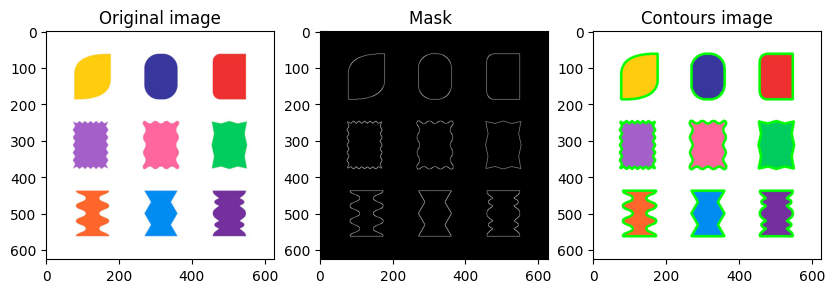

In [7]:
contours, hirarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# MODE - hierarchy relationship between contours
# Method - how contours points are stored.

contour_image = image.copy() # which copy exactly image 
cv2.drawContours(contour_image,contours,-1,(0,255,0),5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(gray,cmap="gray")
plt.title("Mask ")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()

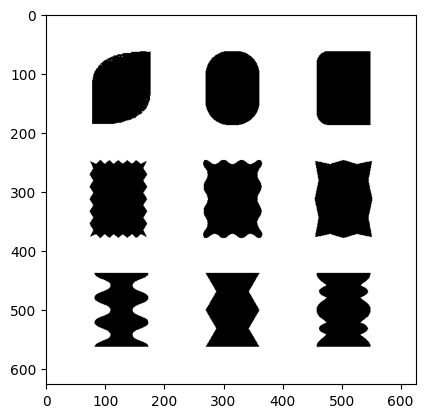

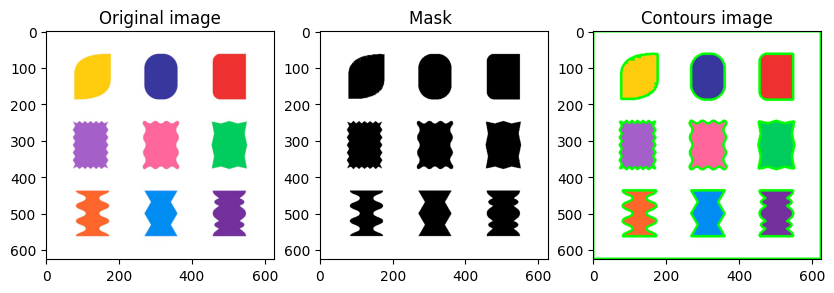

In [ ]:
# Another method thresholding to find contours

retval,binary = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY) # masking
plt.imshow(binary,cmap="gray")

contours, hirarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# MODE - hierarchy relationship between contours
# Method - how contours points are stored.

contour_image = image.copy() # which copy exactly image 
cv2.drawContours(contour_image,contours,-1,(0,255,0),5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(binary,cmap="gray")
plt.title("Mask ")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()

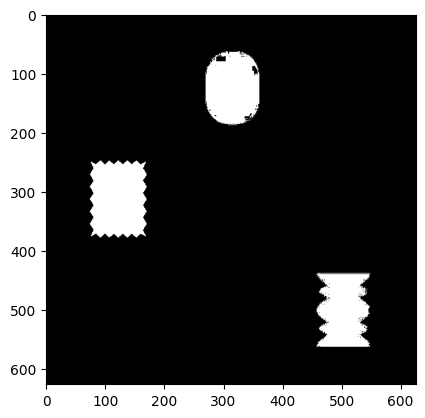

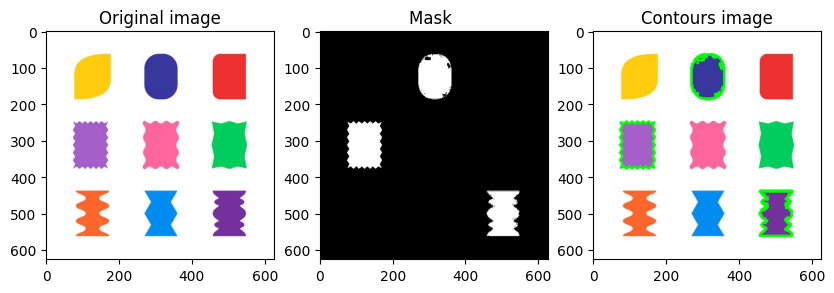

In [15]:
# Another method inrange to find contours

import numpy as np

lower_bound = np.array([120,100,0],dtype=np.uint8)
upper_bound = np.array([160,185,255],dtype=np.uint8)

image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)

mask = cv2.inRange(image_hsv,lower_bound,upper_bound)

plt.imshow(mask,cmap="gray")

contours, hirarchy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# MODE - hierarchy relationship between contours
# Method - how contours points are stored.

contour_image = image.copy() # which copy exactly image 
cv2.drawContours(contour_image,contours,-1,(0,255,0),5) # instead 5 try -1 and see

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Mask ")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()

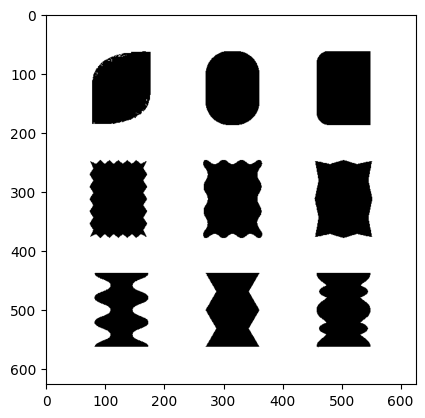

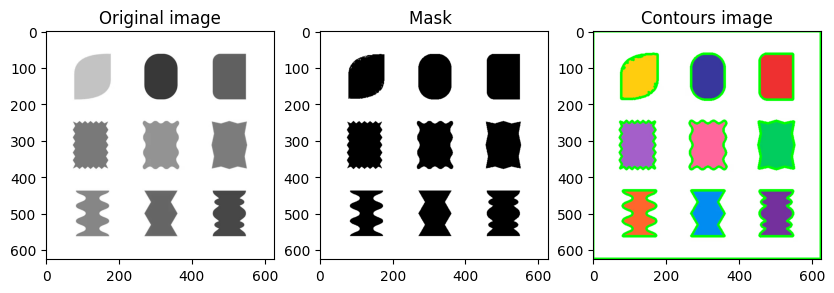

In [24]:
# Another method inrange with gray image to find contours

import numpy as np

lower_bound = np.array([200],dtype=np.uint8)
upper_bound = np.array([255],dtype=np.uint8)


mask = cv2.inRange(image_gray,lower_bound,upper_bound)

plt.imshow(mask,cmap="gray")

contours, hirarchy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# MODE - hierarchy relationship between contours
# Method - how contours points are stored.

contour_image = image.copy() # which copy exactly image 
cv2.drawContours(contour_image,contours,-1,(0,255,0),5) # instead 5 try -1 and see

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_gray,cmap="gray")
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Mask ")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()

# in this case image also consider as an object and it consider as another contour

In [29]:
# Another method will try to add bounding box to find contours

import numpy as np

lower_bound = np.array([200],dtype=np.uint8)
upper_bound = np.array([255],dtype=np.uint8)


mask = cv2.inRange(image_gray,lower_bound,upper_bound)

# plt.imshow(mask,cmap="gray")

contours, hirarchy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

sorted_contours = sorted(contours,key=cv2.contourArea,reverse= True)

print(len(sorted_contours))

contours = sorted_contours[1:10]

32


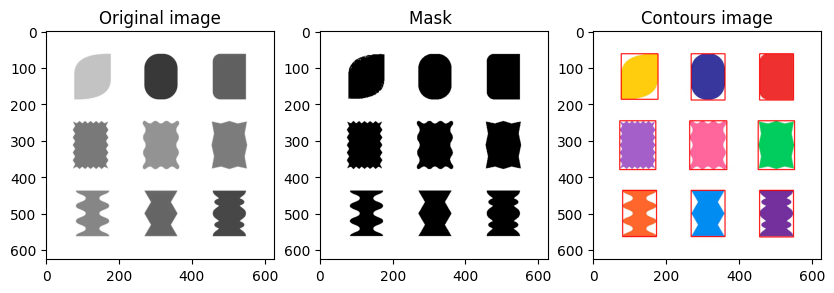

In [31]:
# MODE - hierarchy relationship between contours
# Method - how contours points are stored.

contour_image = image.copy() # which copy exactly image 

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(contour_image,(x,y),(x+w,y+h),(0,0,255),2)
 

# cv2.drawContours(contour_image,contours,-1,(0,255,0),5) # instead 5 try -1 and see

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_gray,cmap="gray")
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Mask ")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()


# in this case we can remove whole image contour boundary by descending order of contours